# 자연어 처리

## 공통 코드

In [1]:
import sys

# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc

#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "natural_language_processing"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
        
import warnings
warnings.filterwarnings(action='ignore')

## 텍스트 전처리

### 문장 토큰화

In [2]:
from nltk import sent_tokenize
#import nltk
#nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


### 단어 토큰화

In [3]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


### 문장 및 단어 토큰화

In [4]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### 불용어 확인

In [5]:
import nltk
#nltk.download('stopwords')

print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


### 불용어 제거

In [6]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming

In [7]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


### Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /Users/adam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


### 배열 생성

In [9]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

### COO 방식

In [10]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))
print(sparse_coo)

# 희소행렬로 변환
print(sparse_coo.toarray())

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
[[3 0 1]
 [0 2 0]]


### CSR 방식

In [11]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])
# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


## 워드 클라우드

### 한글 워드 클라우드

In [12]:
import pytagcloud
import collections

#데이터 생성
nouns = list()
nouns.extend(['불고기' for t in range(8)])
nouns.extend(['비빔밥' for t in range(7)])
nouns.extend(['김치찌개' for t in range(7)])
nouns.extend(['돈까스' for t in range(6)])
nouns.extend(['순두부백반' for t in range(6)])
nouns.extend(['짬뽕' for t in range(6)])
nouns.extend(['짜장면' for t in range(6)])
nouns.extend(['삼겹살' for t in range(5)])
nouns.extend(['초밥' for t in range(5)])
nouns.extend(['우동' for t in range(5)])

#데이터 개수 세기
count = collections.Counter(nouns)
tag2 = count.most_common(100)

#태그 목록 만들기
taglist = pytagcloud.make_tags(tag2, maxsize=50)
print(taglist)

#태그 클라우드 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600), fontname='Korean', rectangular=False)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
[{'color': (103, 116, 171), 'size': 106, 'tag': '불고기'}, {'color': (62, 138, 42), 'size': 95, 'tag': '비빔밥'}, {'color': (70, 156, 57), 'size': 95, 'tag': '김치찌개'}, {'color': (175, 67, 208), 'size': 84, 'tag': '돈까스'}, {'color': (191, 13, 113), 'size': 84, 'tag': '순두부백반'}, {'color': (186, 160, 152), 'size': 84, 'tag': '짬뽕'}, {'color': (58, 153, 192), 'size': 84, 'tag': '짜장면'}, {'color': (170, 125, 195), 'size': 73, 'tag': '삼겹살'}, {'color': (219, 66, 195), 'size': 73, 'tag': '초밥'}, {'color': (190, 57, 30), 'size': 73, 'tag': '우동'}]


### 태그 클라우드 출력

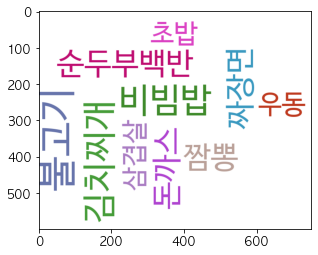

In [13]:
import matplotlib.pyplot
import matplotlib.image

img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

### 이미지 파일을 이용한 워드 클라우드

#### 이미지 파일 출력

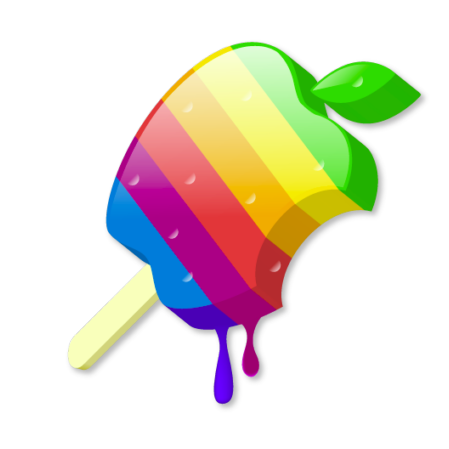

In [14]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#이미지 출력
mask = np.array(Image.open('./data/appleBar.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 데이터 생성과 워드 클라우드 생성

In [15]:
#문자열 생성
text = ''
for t in range(8):
    text = text + 'Python '
for t in range(7):
    text = text + 'Java '
for t in range(7):
    text = text + 'C '
for t in range(8):
    text = text + 'JavaScript '
for t in range(5):
    text = text + 'C# '
for t in range(3):
    text = text + 'Ruby '
for t in range(2):
    text = text + 'scala '
for t in range(6):
    text = text + 'PHP '
for t in range(3):
    text = text + 'Swift '
for t in range(3):
    text = text + 'Kotlin ' 

#제거할 단어 설정
stopwords = set(STOPWORDS)
stopwords.add("Kotlin")

#워드 클라우드 만들기
wordcloud = WordCloud(background_color='white', max_words=2000, mask=mask,
              stopwords = stopwords)
#특수문자를 무시하므로 C 와 C#을 동일한 단어로 판단
wordcloud = wordcloud.generate(text)
wordcloud.words_

{'C': 1.0,
 'Python': 0.6666666666666666,
 'JavaScript': 0.6666666666666666,
 'Java': 0.5833333333333334,
 'PHP': 0.5,
 'Ruby': 0.25,
 'Swift': 0.25,
 'scala': 0.16666666666666666}

#### 화면 출력

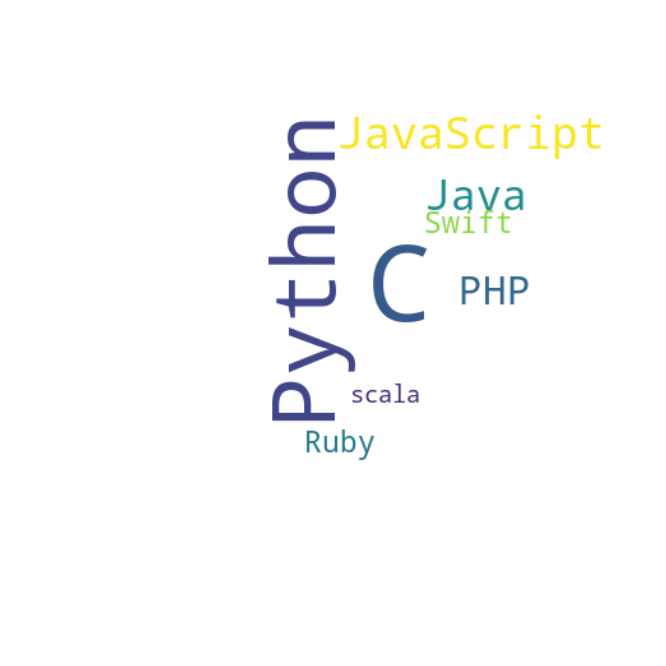

In [16]:
#워드 클라우드 화면 출력
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 한글 형태소 분석

In [17]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences('한국어의 문장 분석'))
print(kkma.nouns('한국어의 단어별 분석'))
print(kkma.pos('한국어의 형태소 분석'))

print("==============================================")
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.nouns('한국어의 단어별 분석'))
print(hannanum.morphs('한국어의 형태소 분석'))
print(hannanum.pos('한국어의 형태소 분석'))

print("==============================================")
from konlpy.tag import Twitter
t = Twitter()
print(t.nouns('한국어의 단어별 분석'))
print(t.morphs('한국어의 형태소 분석'))
print(t.pos('한국어의 형태소 분석'))

['한국어의 문장 분석']
['한국어', '단어', '분석']
[('한국어', 'NNG'), ('의', 'JKG'), ('형태소', 'NNG'), ('분석', 'NNG')]
['한국어', '단어별', '분석']
['한국어', '의', '형태소', '분석']
[('한국어', 'N'), ('의', 'J'), ('형태소', 'N'), ('분석', 'N')]
['한국어', '단어', '별', '분석']
['한국어', '의', '형태소', '분석']
[('한국어', 'Noun'), ('의', 'Josa'), ('형태소', 'Noun'), ('분석', 'Noun')]


### 동아일보 기사 검색을 이용한 워드 클라우드

#### 기사 검색

In [18]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import quote

keyword = input('검색어:')
target_URL = "http://news.donga.com/search?p=1" + '&query=' + quote(keyword) + '&check_news=1&more=1&sorting=3&search_date=1&range=3'
source_code_from_URL = requests.get(target_URL)
bs = BeautifulSoup(source_code_from_URL.text, 'html.parser')

#기사 건수를 가져오기 위한 파싱
cnt = bs.select("div.searchContWrap div.searchCont h2 span")
temp = cnt[0].getText().split(' ')
count = int(temp[1])
print("기사 건수:",count) 

검색어:박문석
기사 건수: 9


#### 읽은 기사 텍스트 파일에 저장

In [19]:
page_num = int(input("읽어올 기사의 개수:")) / 15 + 1
output_file = open(keyword + ".txt", 'w', encoding="utf8")

for i in range(int(page_num)):
    current_page_num = 1 + i * 15
    target_URL = "http://news.donga.com/search?p=" + str(current_page_num) +  '&query=' + quote(
        keyword) + '&check_news=1&more=1&sorting=3&search_date=1&range=3'
    source_code_from_URL = requests.get(target_URL)
    bs = BeautifulSoup(source_code_from_URL.text, 'html.parser')

    for title in bs.find_all('p', 'tit'):
        title_link = title.select('a')
        article_URL = title_link[0]['href']
        #print(article_URL)
        source_code_from_url = requests.get(article_URL)
        soup = BeautifulSoup(source_code_from_url.text, 'html.parser')
        content_of_article = soup.select('div.article_txt')
        for item in content_of_article:
            string_item = str(item.find_all(text=True))
            output_file.write(string_item)
            
output_file.close()

읽어올 기사의 개수:9


#### 형태소 분석

In [20]:
from konlpy.tag import Twitter
open_text_file = open(keyword + ".txt", 'r', encoding="utf8")
text = open_text_file.read()
spliter = Twitter()
nouns = spliter.nouns(text)
open_text_file.close()
print(nouns)

['한국', '산업', '인력', '공단', '임용', '정직', '대전', '지역', '본부장', '엄', '주천', '승진', '급', '경남', '사장', '김동일', '경기', '북부', '김희선', '급', '감', '사실', '하필', '규', '무국', '장훈', '산업', '팀', '문승현', '학습', '운영', '상진', '외국인', '도입', '김호연', '글로벌', '협력', '양열', '서울', '센터', '이우진', '기술', '자격', '출제', '실', '유행', '석', '센터', '김동자', '서울', '동부', '지사', '주관', '경기', '유찬', '숙', '경북', '권', '형태', '경북', '동부', '이관구', '대전', '지역', '본부', '김준영', '전보', '급', '영기획', '실장', '최상', '건', '기술', '자격', '출제', '유', '자격', '혁신', '국장', '장덕', '호', '응용', '공학', '팀', '김재', '건설', '환경', '홍', '정혁', '글로벌', '숙련', '기술', '진흥', '원장', '전화', '익', '서울', '지역', '본부장', '김병주', '부산', '변', '무장', '강원', '동부', '사장', '박영환', '경북', '동부', '김우현', '경기', '동부', '박찬', '섭', '전남', '서부', '이담', '철', '서울', '지역', '본부', '직업', '능력', '개발', '팀', '손규일', '부산', '직업', '능력', '개발', '동영', '부산', '지역', '학습', '센터', '김현', '생', '대구', '직업', '능력', '개발', '팀', '박종규', '중부', '휘', '광주', '창기', '대전', '김균', '현', '급', '고객', '센터', '김', '동구', '미래', '전략', '팀', '김정우', '인재', '개발', '고재', '철', '지역', '지원', '윤', '재연', '사업', '

#### 단어 개수 세기

In [21]:
import nltk
ko = nltk.Text(nouns, name='박문석')
print('전체 단어 개수:', len(ko.tokens))
print('중복 제거 후 개수:', len(set(ko.tokens)))
#단어 별 등장 횟수
print(ko.vocab())

전체 단어 개수: 8639
중복 제거 후 개수: 2504
<FreqDist with 2504 samples and 8639 outcomes>


#### 단어 개수 별 시각화

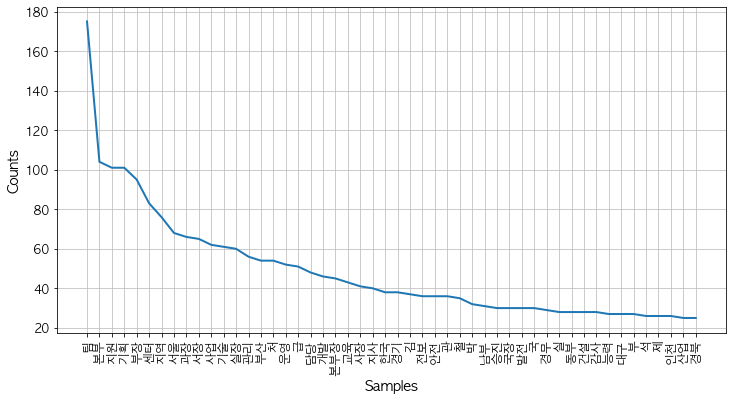

In [22]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

#### 불용어 제거

In [23]:
stop_words = ['팀','처','급','관','철','김','부','실']

ko = [each_word for each_word in ko if each_word not in stop_words]
print(ko)

['한국', '산업', '인력', '공단', '임용', '정직', '대전', '지역', '본부장', '엄', '주천', '승진', '경남', '사장', '김동일', '경기', '북부', '김희선', '감', '사실', '하필', '규', '무국', '장훈', '산업', '문승현', '학습', '운영', '상진', '외국인', '도입', '김호연', '글로벌', '협력', '양열', '서울', '센터', '이우진', '기술', '자격', '출제', '유행', '석', '센터', '김동자', '서울', '동부', '지사', '주관', '경기', '유찬', '숙', '경북', '권', '형태', '경북', '동부', '이관구', '대전', '지역', '본부', '김준영', '전보', '영기획', '실장', '최상', '건', '기술', '자격', '출제', '유', '자격', '혁신', '국장', '장덕', '호', '응용', '공학', '김재', '건설', '환경', '홍', '정혁', '글로벌', '숙련', '기술', '진흥', '원장', '전화', '익', '서울', '지역', '본부장', '김병주', '부산', '변', '무장', '강원', '동부', '사장', '박영환', '경북', '동부', '김우현', '경기', '동부', '박찬', '섭', '전남', '서부', '이담', '서울', '지역', '본부', '직업', '능력', '개발', '손규일', '부산', '직업', '능력', '개발', '동영', '부산', '지역', '학습', '센터', '김현', '생', '대구', '직업', '능력', '개발', '박종규', '중부', '휘', '광주', '창기', '대전', '김균', '현', '고객', '센터', '동구', '미래', '전략', '김정우', '인재', '개발', '고재', '지역', '지원', '윤', '재연', '사업', '훈련', '지원', '영', '컨소시엄', '지원', '박동준', '직업', '방송', '매체', '이채', '욱',

#### 시각화

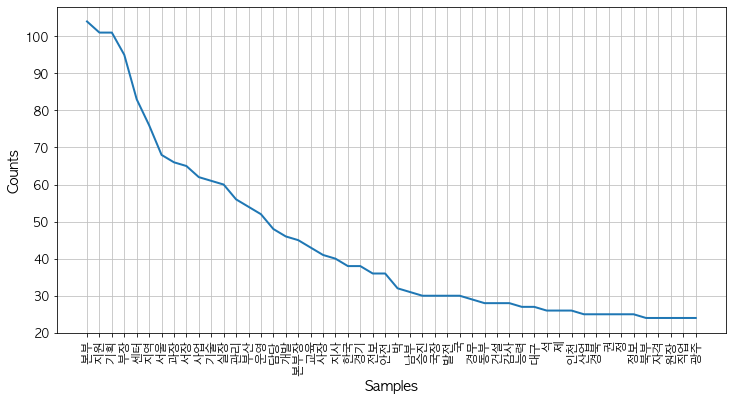

In [24]:
ko = nltk.Text(ko, name='박문석')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

#### 워드 클라우드

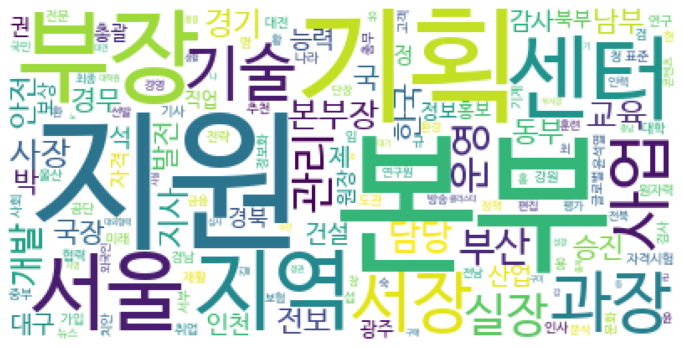

In [25]:
data = ko.vocab().most_common(150)
    
wordcloud = WordCloud(font_path = './data/NanumBarunGothic.ttf',
                      relative_scaling = 0.5,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 마스크 적용

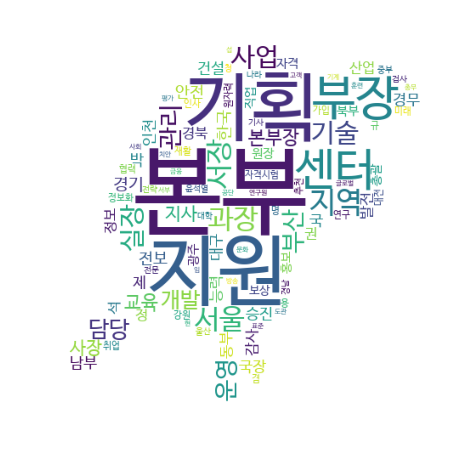

In [26]:
import numpy as np
mask = np.array(Image.open('data/appleBar.png'))
data = ko.vocab().most_common(100)
wordcloud = WordCloud(font_path='./data/NanumBarunGothic.ttf',
                      relative_scaling = 0.5,
                      background_color='white',
                      mask=mask,
                      ).generate_from_frequencies(dict(data))
%matplotlib inline
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 뉴스그룹 분류

### 데이터 확인

In [27]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


### 타겟 확인

In [28]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n',news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### 데이터 확인

In [29]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

### 불필요한 데이터를 제거하고 훈련 데이터 와 테스트 데이터 분리

In [30]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


### 피처 벡터화

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()

cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit( )된 CountVectorizer를 이용하여 테스트 데이터를 feature extraction 변환 수행. 
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:',X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


### 로지스틱 회귀 적용

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.607


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환. 
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# LogisticRegression을 이용하여 학습/예측/평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.674


### TF-IDF 의 파라미터를 설정한 후 훈련

In [34]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.692


### 교차 검증 후 최적의 파라미터 찾기(오래 걸림)

In [35]:
from sklearn.model_selection import GridSearchCV

# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정. 
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )

# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가. 
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.701


### Pipeline 과 GridSearchCV 결합

In [36]:
from sklearn.pipeline import Pipeline

# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(C=10))
])

# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음. 
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능. 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.701


## 감성 분석

### 긍정-부정 분류

In [37]:
#훈련 데이터 생성
### 단어별 분류를 위한 패키지 import
from nltk.tokenize import word_tokenize
import nltk

### 훈련 데이터 만들기
train = [('i like you', 'pos'), 
         ('i do not like you', 'neg'),
         ('i hate you', 'neg'), 
         ('i do not hate you', 'pos'),
        ('i love you', 'pos'),
        ('I do not love you', 'neg')]
all_words = set(word.lower() for sentence in train 
            for word in word_tokenize(sentence[0]))
all_words

{'do', 'hate', 'i', 'like', 'love', 'not', 'you'}

In [38]:
#단어 토큰화
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
print(t)

#분류기 만들기
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

[({'love': False, 'i': True, 'not': False, 'like': True, 'do': False, 'hate': False, 'you': True}, 'pos'), ({'love': False, 'i': True, 'not': True, 'like': True, 'do': True, 'hate': False, 'you': True}, 'neg'), ({'love': False, 'i': True, 'not': False, 'like': False, 'do': False, 'hate': True, 'you': True}, 'neg'), ({'love': False, 'i': True, 'not': True, 'like': False, 'do': True, 'hate': True, 'you': True}, 'pos'), ({'love': True, 'i': True, 'not': False, 'like': False, 'do': False, 'hate': False, 'you': True}, 'pos'), ({'love': True, 'i': False, 'not': True, 'like': False, 'do': True, 'hate': False, 'you': True}, 'neg')]
Most Informative Features
                      do = False             pos : neg    =      1.7 : 1.0
                      do = True              neg : pos    =      1.7 : 1.0
                     not = False             pos : neg    =      1.7 : 1.0
                     not = True              neg : pos    =      1.7 : 1.0
                       i = True           

In [39]:
#샘플 문장 테스트 
test_sentence = 'i do not like jessica'
test_sent_features = {word.lower():(word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
print(test_sent_features)
print(classifier.classify(test_sent_features))

{'love': False, 'i': True, 'not': True, 'like': True, 'do': True, 'hate': False, 'you': False}
neg


## 한글 처리

In [40]:
#샘플 문장 생성
from konlpy.tag import Twitter
twitter = Twitter()
train = [('나는 당신을 사랑합니다', 'pos'), 
         ('나는 당신을 사랑하지 않아요', 'neg'),
         ('나는 당신을 만나는 것이 지루합니다', 'neg'),
         ('나는 당신을 만나는 것이 지루하지 않습니다', 'pos'),
         ('나는 당신이 좋습니다', 'pos'),
         ('나는 당신이 좋지 않습니다', 'neg'),
         ('나는 당신과 노는 것이 즐겁습니다', 'pos'),
         ('나는 당신과 노는 것이 즐겁지 않습니다', 'neg'),
        ('나는 제시카와 함께 있는 것이 즐겁습니다', 'pos'),
        ('나는 일을 하는 것이 즐겁지 않습니다', 'neg'),
         ('나는 일이 너무 힘들어', 'neg')]

In [41]:
#단순 단어 분류 – 조사가 다른 경우 다른 단어로 구분됨
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
print(all_words)

{'좋습니다', '일을', '너무', '노는', '당신이', '만나는', '나는', '일이', '당신을', '좋지', '즐겁지', '사랑합니다', '함께', '지루하지', '당신과', '하는', '힘들어', '않아요', '제시카와', '사랑하지', '즐겁습니다', '것이', '지루합니다', '있는', '않습니다'}


In [42]:
#단어 분리 - 형태소 분석 후 수행
def tokenize(doc):
    return ['/'.join(t) for t in twitter.pos(doc, norm=True, stem=True)]

train_docs = [(tokenize(row[0]), row[1]) for row in train]
print(train_docs)

[(['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '않다/Verb'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa', '제시카/Noun', '와/Josa', '함께/Adverb', '있다/Adjective', '것/Noun', '이/Josa', '즐겁다/Adjective'], 'pos'), (['나/Noun', '는/Josa', '일/Noun', '을/Josa', '하다/Verb', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb'], 'neg'), (['나/Noun', '는/Josa'

In [43]:
#형태소 분류를 한 후 단어 분류
tokens = [t for d in train_docs for t in d[0]]
print(tokens)

['나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '사랑/Noun', '하다/Verb', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '을/Josa', '만나다/Verb', '것/Noun', '이/Josa', '지루하다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '이/Josa', '좋다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective', '나/Noun', '는/Josa', '당신/Noun', '과/Josa', '노/Noun', '는/Josa', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '제시카/Noun', '와/Josa', '함께/Adverb', '있다/Adjective', '것/Noun', '이/Josa', '즐겁다/Adjective', '나/Noun', '는/Josa', '일/Noun', '을/Josa', '하다/Verb', '것/Noun', '이/Josa', '즐겁다/Adjective', '않다/Verb', '나/Noun', '는/Josa', '일이/Modifier', '너무/Adverb', '힘들다/Adjective']


In [44]:
### 훈련 데이터 확인
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}
train_xy = [(term_exists(d), c) for d,c in train_docs]
print(train_xy)

[({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': False, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '과/Josa': False, '노/Noun': False, '즐겁다/Adjective': False, '제시카/Noun': False, '와/Josa': False, '함께/Adverb': False, '있다/Adjective': False, '일/Noun': False, '일이/Modifier': False, '너무/Adverb': False, '힘들다/Adjective': False}, 'pos'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': True, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '과/Josa': False, '노/Noun': False, '즐겁다/Adjective': False, '제시카/Noun': False, '와/Josa': False, '함께/Adverb': False, '있다/Adjective': False, '일/Noun': False, '일이/Modifier': False, '너무/Adverb': False, '힘들다/Adjective': False}, 'neg'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': False, '하다/Verb': False,

In [45]:
### 분류기 만들기
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}
train_xy = [(term_exists(d), c) for d,c in train_docs]
print(train_xy)

classifier = nltk.NaiveBayesClassifier.train(train_xy)
classifier.show_most_informative_features()

[({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': False, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '과/Josa': False, '노/Noun': False, '즐겁다/Adjective': False, '제시카/Noun': False, '와/Josa': False, '함께/Adverb': False, '있다/Adjective': False, '일/Noun': False, '일이/Modifier': False, '너무/Adverb': False, '힘들다/Adjective': False}, 'pos'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': True, '하다/Verb': True, '않다/Verb': True, '만나다/Verb': False, '것/Noun': False, '이/Josa': False, '지루하다/Adjective': False, '좋다/Adjective': False, '과/Josa': False, '노/Noun': False, '즐겁다/Adjective': False, '제시카/Noun': False, '와/Josa': False, '함께/Adverb': False, '있다/Adjective': False, '일/Noun': False, '일이/Modifier': False, '너무/Adverb': False, '힘들다/Adjective': False}, 'neg'), ({'나/Noun': True, '는/Josa': True, '당신/Noun': True, '을/Josa': True, '사랑/Noun': False, '하다/Verb': False,

In [46]:
### 샘플 문장 테스트
test_sentence = [("여섯시 부터 일을 해야해")]
test_docs = twitter.pos(test_sentence[0])
print(test_docs)
test_sent_features = {word: (word in tokens) for word in test_docs}
print(test_sent_features)
print(classifier.classify(test_sent_features))

[('여섯시', 'Noun'), ('부터', 'Noun'), ('일', 'Noun'), ('을', 'Josa'), ('해야해', 'Verb')]
{('여섯시', 'Noun'): False, ('부터', 'Noun'): False, ('일', 'Noun'): False, ('을', 'Josa'): False, ('해야해', 'Verb'): False}
neg


## 지도 학습 기반 감성 분석

### 데이터 가져오기

In [47]:
import pandas as pd

review_df = pd.read_csv('./data/word2vec-nlp-tutorial/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


### 불필요한 데이터 삭제

In [48]:
#정규식 모듈
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

### 훈련 데이터 와 테스트 데이터 분리

In [49]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

### 로지스틱 회귀를 이용한 훈련 과 평가 지표 확인

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8860, ROC-AUC는 0.9503


### 전처리 작업을 수행 한 후 학습

In [51]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


## 비지도 학습 기반 감성 분석

### nltk 의 WordNet 의 Synset

In [52]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/adam/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/adam/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]   

[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to /Users/adam/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     /Users/adam/nltk_data...
[nltk_data]    |   Package webtext is alre

True

In [53]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [54]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

In [55]:
#단어별 유사도 측정
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [56]:
#SentiWordNet의 Senti_Synset 
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [57]:
#감성 지수 확인
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


### 영화 감상평 감성 분석

In [58]:
#품사를 리턴해주는 함수
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [59]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

#문장을 받아서 긍정 및 부정을 평가해주는 함수
def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [60]:
#이전에 읽어온 데이터를 이용해서 감성 분석 - 오래 걸림(5~10분)
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix( y_target, preds))
print("정확도:", np.round(accuracy_score(y_target , preds), 4))
print("정밀도:", np.round(precision_score(y_target , preds),4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


## 식당 리뷰 감성 분석
### 데이터는 네이버에서 크롤링
### score는 별점
### review는 리뷰 내용
### y는 score 가 4이상이면 1(긍정) 그렇지 않으면 0(부정)으로 설정

### 데이터 가져오기

In [61]:
df = pd.read_csv("./data/review_data.csv")
print(df.head())

   score                      review  y
0      5            친절하시고 깔끔하고 좋았습니다  1
1      5                  조용하고 고기도 굿  1
2      4      갈비탕과 냉면, 육회비빔밥이 맛있습니다.  1
3      4  대체적으로 만족하나\n와인의 구성이 살짝 아쉬움  1
4      5       고기도 맛있고 서비스는 더 최고입니다~  1


### 한글 데이터 만 추출

In [62]:
import re
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    # 한글의 정규표현식으로 한글만 추출합니다.
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [63]:
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
del df['review']
df.head()

,score,y,ko_text
0,5,1,친절하시고 깔끔하고 좋았습니다
1,5,1,조용하고 고기도 굿
2,4,1,갈비탕과 냉면 육회비빔밥이 맛있습니다
3,4,1,대체적으로 만족하나와인의 구성이 살짝 아쉬움
4,5,1,고기도 맛있고 서비스는 더 최고입니다


### 한글 형태소 분석

In [64]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'][0])
print(result)

['친절하시고/Adjective', '깔끔하고/Adjective', '좋았습니다/Adjective']


### 학습 데이터 생성

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

X.shape

(545, 3030)

### 데이터 확인

In [66]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'친절하시고/Adjective': 2647, '깔끔하고/Adjective': 428, '좋았습니다/Adjective': 2403, '조용하고/Adjective': 2356, '고..


In [67]:
print(df['ko_text'][0])
print(X[0])

친절하시고 깔끔하고 좋았습니다
  (0, 2647)	1
  (0, 428)	1
  (0, 2403)	1


### TF-IDF 변환

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(545, 3030)
  (0, 2647)	0.5548708693511647
  (0, 2403)	0.48955631270748484
  (0, 428)	0.6726462183300624


### 학습용 데이터 생성

In [69]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(381, 3030)
(164, 3030)


### 분류 훈련

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 로지스틱 회귀모델을 학습합니다.
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 로지스틱 회귀모델의 성능을 평가합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.90
Precision : 0.896
Recall : 1.000
F1 : 0.945


In [71]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[  0  17]
 [  0 147]]


AUC : 0.910


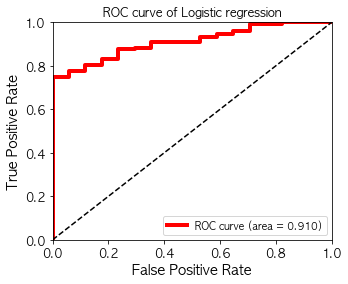

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### 레이블의 분포 확인

In [73]:
# y가 0과 1을 각각 얼마나 가지고 있는지를 출력합니다.
df['y'].value_counts()

1    492
0     53
Name: y, dtype: int64

In [74]:
# 1:1 비율로 랜덤 샘플링을 수행합니다.
positive_random_idx = df[df['y']==1].sample(50, random_state=30).index.tolist()
negative_random_idx = df[df['y']==0].sample(50, random_state=30).index.tolist()

# 랜덤 데이터로 데이터셋을 나눕니다.
random_idx = positive_random_idx + negative_random_idx
sample_X = X[random_idx, :]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(70, 3030)
(30, 3030)


In [75]:
# 로지스틱 회귀모델을 다시 학습합니다.
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

# 학습한 모델을 테스트 데이터로 평가합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.33
Precision : 0.000
Recall : 0.000
F1 : 0.000


In [76]:
# Confusion matrix를 출력합니다.
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[10  0]
 [20  0]]


AUC : 0.935


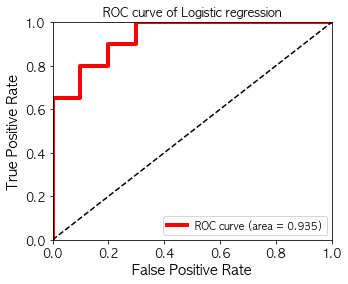

In [77]:
# AUC를 계산합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve 그래프를 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

### 피처의 중요도 확인

<BarContainer object of 3030 artists>

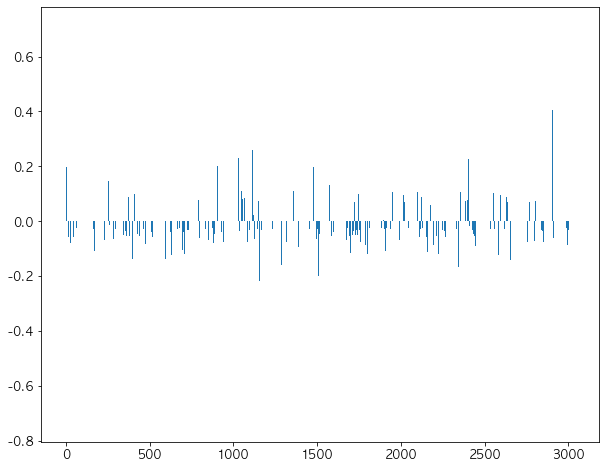

In [79]:
# 학습한 회귀 모델의 계수를 출력합니다.
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

### 상위 5개 와 하위 5개 회귀 계수 출력

In [80]:
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

[(0.7089983966234911, 1013), (0.6565297427171582, 428), (0.5955075217620174, 999), (0.4527060182045674, 1093), (0.40719360196391946, 2906)]
[(-0.43269864922734647, 1309), (-0.4407387918031072, 980), (-0.444920440114969, 2312), (-0.49088610015362577, 2082), (-0.7315793109704828, 2069)]


### 상위 형태소 20개 출력

In [81]:
# 회귀 모델의 계수를 높은 순으로 정렬합니다. 
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력할 수 있게 합니다.
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로, 피처에 형태소를 맵핑한 결과를 출력합니다. 계수가 높은 피처는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있습니다.
print(str(invert_index_vectorizer)[:100]+'..')

{2647: '친절하시고/Adjective', 428: '깔끔하고/Adjective', 2403: '좋았습니다/Adjective', 2356: '조용하고/Adjective', 23..


In [82]:
# 상위 20개 긍정 형태소를 출력합니다.
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

맛있습니다/Adjective 0.7089983966234911
깔끔하고/Adjective 0.6565297427171582
맛있게/Adjective 0.5955075217620174
먹었습니다/Verb 0.4527060182045674
합니다/Verb 0.40719360196391946
잘/VerbPrefix 0.39733299652447485
추천/Noun 0.39260685101736864
갑니다/Verb 0.37539236568535134
생생하니/Adjective 0.3619540143396768
모두/Noun 0.3012751848704199
친절해요/Adjective 0.2963031868978717
맛있고/Adjective 0.28539332756818764
친절하시고/Adjective 0.27346010220334854
비싸다여/Adjective 0.2633948607931071
데넘/Noun 0.2633948607931071
좋았습니다/Adjective 0.2633166093661429
먹음/Noun 0.2605499519878195
조용하진/Adjective 0.2483753044176239
맛있는/Adjective 0.2398996853747597
지인/Noun 0.2349564853517235


In [83]:
# 상위 20개 부정 형태소를 출력합니다.
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

한참/Noun -0.19707319631966036
서비스/Noun -0.19910928809746886
고/Josa -0.20702865676412113
적어요/Verb -0.21212718827142243
을/Josa -0.2135020522440777
못/VerbPrefix -0.21623745955600363
조금/Noun -0.23430813266846207
그/Determiner -0.2350030452050383
테이블/Noun -0.24749262718789583
시끄러워요/Adjective -0.25163170070169133
ㅠㅠㅠㅠ/KoreanParticle -0.25163170070169133
주문/Noun -0.2681430360848227
를/Josa -0.2776861551054112
명/Noun -0.29644588069272526
기대이하였음/Verb -0.3558609638553393
별로/Noun -0.43269864922734647
많이/Adverb -0.4407387918031072
점/Noun -0.444920440114969
이/Josa -0.49088610015362577
은/Josa -0.7315793109704828


In [84]:
noun_list = []
adjective_list = []

# 명사, 형용사별로 계수가 높은 상위 10개의 형태소를 추출합니다. 이는 리뷰에 긍정적인 영향을 주는 명사와 형용사를 순위별로 살펴보는 것이 됩니다.
for coef in coef_pos_index[:100]:
    pos_category = invert_index_vectorizer[coef[1]].split("/")[1]
    if pos_category == "Noun":
        noun_list.append((invert_index_vectorizer[coef[1]], coef[0]))
    elif pos_category == "Adjective":
        adjective_list.append((invert_index_vectorizer[coef[1]], coef[0]))

In [85]:
# 상위 10개의 명사를 출력합니다.
noun_list[:10]

[('추천/Noun', 0.39260685101736864),
 ('모두/Noun', 0.3012751848704199),
 ('데넘/Noun', 0.2633948607931071),
 ('먹음/Noun', 0.2605499519878195),
 ('지인/Noun', 0.2349564853517235),
 ('전문점/Noun', 0.2335902631086717),
 ('가족/Noun', 0.23008822203469248),
 ('합/Noun', 0.2049946851445051),
 ('진짜/Noun', 0.20490806322048918),
 ('리필/Noun', 0.19958545311298173)]

In [86]:
# 상위 10개의 형용사를 출력합니다.
adjective_list[:10]

[('맛있습니다/Adjective', 0.7089983966234911),
 ('깔끔하고/Adjective', 0.6565297427171582),
 ('맛있게/Adjective', 0.5955075217620174),
 ('생생하니/Adjective', 0.3619540143396768),
 ('친절해요/Adjective', 0.2963031868978717),
 ('맛있고/Adjective', 0.28539332756818764),
 ('친절하시고/Adjective', 0.27346010220334854),
 ('비싸다여/Adjective', 0.2633948607931071),
 ('좋았습니다/Adjective', 0.2633166093661429),
 ('조용하진/Adjective', 0.2483753044176239)]

## 네이버 영화 평점 감성 분석

### 영화 데이터 가져오기

In [87]:
train_df = pd.read_csv('./data/naver_movie/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


### 레이블 개수 확인

In [88]:
train_df['label'].value_counts( )

0    75173
1    74827
Name: label, dtype: int64

### 한글 전처리

In [89]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('./data/naver_movie/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

### 한글 형태소 분석 함수

In [90]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

### 분류 모델 학습

In [91]:
#오래 걸림
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [92]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8592


### 정확도 확인

In [93]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도:  0.86186


## 토픽 모델링

### 텍스트 벡터화

In [94]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=42)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


### 토픽 모델링 수행

In [95]:
#토픽의 개수는 8개
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

### 개별 토픽 별로 그룹에 얼마나 할당되었는지 확인

In [96]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[4.14643870e+01, 1.33073480e+02, 2.14847371e+01, ...,
        2.69571371e+01, 9.13811808e+01, 6.84995996e+01],
       [1.25205043e-01, 1.37076923e+01, 1.25045906e-01, ...,
        1.62073483e+02, 1.25101876e-01, 9.22954209e+01],
       [3.47085826e+02, 1.25174990e-01, 1.55577150e+02, ...,
        1.25102744e-01, 3.67855838e+01, 1.25027069e-01],
       ...,
       [2.90193119e+01, 1.71862889e+01, 5.15654522e+00, ...,
        1.58706650e+01, 6.84379021e+00, 1.51912799e+01],
       [1.25131135e-01, 1.26149214e-01, 1.25006141e-01, ...,
        8.22518564e+01, 1.25122317e-01, 3.65637080e+01],
       [4.22330750e+01, 8.15291681e+00, 2.81348439e-01, ...,
        4.56326229e+01, 1.25048179e-01, 1.25054640e-01]])

### 토픽별로 연관도가 높은 순으로 나열

In [97]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease 1993 cancer games years patients 92
Topic # 1
don just know like said people time think didn ve right going say ll did
Topic # 2
image file jpeg program gif output format images color files entry 00 use bit 03
Topic # 3
like think don just use does know good time people used question read point make
Topic # 4
armenian israel jews armenians turkish people israeli jewish government war dos dos turkey arab 000 armenia
Topic # 5
edu com available graphics ftp window motif data pub mail widget information use server mit
Topic # 6
god jesus people church christ believe christian does christians say bible faith sin think paul
Topic # 7
thanks dos use windows using does help like need display know software server pc problem


## 문서 군집화

### 텍스트 읽어오기

In [98]:
import pandas as pd
import glob ,os

path = './data/OpinosisDataset1.0/topics'                     
# path로 지정한 디렉토리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합, 
# 개별 파일들의 파일내용은 DataFrame로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합 
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Windows에서 수행시에는 아래 /를 \\ 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
print(document_df.head())

                        filename  \
0     battery-life_ipod_nano_8gb   
1  gas_mileage_toyota_camry_2007   
2        room_holiday_inn_london   
3    location_holiday_inn_london   
4    staff_bestwestern_hotel_sfo   

                                        opinion_text  
0                                                ...  
1                                                ...  
2                                                ...  
3                                                ...  
4                                                ...  


### TF-IDF 로 벡터화

In [101]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

### 군집 알고리즘 수행

In [102]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [103]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,3
1,gas_mileage_toyota_camry_2007,...,2
2,room_holiday_inn_london,...,0
3,location_holiday_inn_london,...,0
4,staff_bestwestern_hotel_sfo,...,0


In [104]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
31,bathroom_bestwestern_hotel_sfo,...,0
17,food_holiday_inn_london,...,0
32,food_swissotel_chicago,...,0
49,free_bestwestern_hotel_sfo,...,0
39,location_bestwestern_hotel_sfo,...,0
3,location_holiday_inn_london,...,0
50,parking_bestwestern_hotel_sfo,...,0
28,price_holiday_inn_london,...,0
2,room_holiday_inn_london,...,0
46,rooms_bestwestern_hotel_sfo,...,0


In [105]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
33,accuracy_garmin_nuvi_255W_gps,...,1
34,directions_garmin_nuvi_255W_gps,...,1
48,display_garmin_nuvi_255W_gps,...,1
21,features_windows7,...,1
12,keyboard_netbook_1005ha,...,1
10,satellite_garmin_nuvi_255W_gps,...,1
8,screen_garmin_nuvi_255W_gps,...,1
25,screen_ipod_nano_8gb,...,1
37,screen_netbook_1005ha,...,1
7,size_asus_netbook_1005ha,...,1


In [106]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
18,comfort_honda_accord_2008,...,2
43,comfort_toyota_camry_2007,...,2
1,gas_mileage_toyota_camry_2007,...,2
45,interior_honda_accord_2008,...,2
22,interior_toyota_camry_2007,...,2
35,mileage_honda_accord_2008,...,2
47,performance_honda_accord_2008,...,2
42,quality_toyota_camry_2007,...,2
29,seats_honda_accord_2008,...,2
23,transmission_toyota_camry_2007,...,2


In [107]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
9,battery-life_amazon_kindle,...,3
0,battery-life_ipod_nano_8gb,...,3
11,battery-life_netbook_1005ha,...,3
15,performance_netbook_1005ha,...,3
24,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,3


In [108]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
26,buttons_amazon_kindle,...,4
36,eyesight-issues_amazon_kindle,...,4
44,fonts_amazon_kindle,...,4
38,navigation_amazon_kindle,...,4
41,price_amazon_kindle,...,4


### 3개의 군집으로 수행

In [109]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,0
48,display_garmin_nuvi_255W_gps,...,0
44,fonts_amazon_kindle,...,0
41,price_amazon_kindle,...,0
40,speed_windows7,...,0
38,navigation_amazon_kindle,...,0
37,screen_netbook_1005ha,...,0
36,eyesight-issues_amazon_kindle,...,0
34,directions_garmin_nuvi_255W_gps,...,0
33,accuracy_garmin_nuvi_255W_gps,...,0


### 단어 피처들의 중심으로부터의 거리 확인

In [110]:
# 행은 개별 군집을 의미하며 열은 개별 피처를 의미
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


### 군집별 핵심 단어 추출

In [111]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [112]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [113]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['battery-life_ipod_nano_8gb', 'voice_garmin_nuvi_255W_gps', 'speed_garmin_nuvi_255W_gps', 'size_asus_netbook_1005ha', 'screen_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'satellite_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['gas_mileage_toyota_camry_2007', 'comfort_honda_accord_2008', 'interior_toyota_camry_2007', 'transmission_toyota_camry_2007', 'seats_honda_accord_2008', 'mileage_honda_accord_2008', 'quality_toyota_camry_2007']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['room_holiday_inn_london', 'location_holiday_inn_london', 'staff_bestwestern_hotel_sfo', 'service_swissotel_hot

## 문장의 유사도 측정

### 코사인 유사도를 측정해주는 함수

In [114]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

### 유사도 측정을 위한 데이터 생성

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [116]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402
문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [117]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [118]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [119]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### 이전 리뷰 문서에서의 유사도 측정

In [120]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([1, 18, 22, 23, 29, 35, 42, 43, 45, 47], dtype='int64')
##### 비교 기준 문서명  gas_mileage_toyota_camry_2007  와 타 문서 유사도######
[[1.         0.15655631 0.0879083  0.08217817 0.06276647 0.96608144
  0.14398794 0.27273923 0.05452321 0.20206332]]


### 문서의 유사도 시각화

Text(0.5, 1.0, 'gas_mileage_toyota_camry_2007')

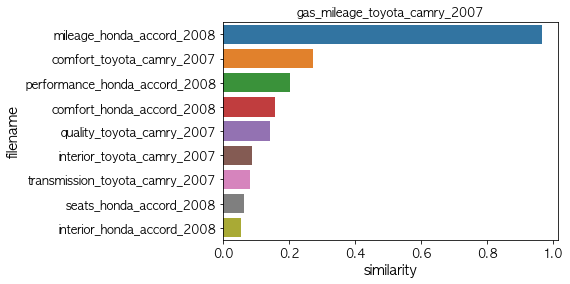

In [121]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

## 한글 문장의 유사도 측정

### 훈련 데이터 만들기

In [122]:
### 훈련 데이터 만들기
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Twitter
twitter = Twitter()
vectorizer = CountVectorizer(min_df = 1)
contents = ['우리 과일 먹으로 가자',
                   '나는 고기를 좋아합니다',
                   '나는 공원에서 산책하는 것을 싫어합니다',
                   '안녕하세요 반갑습니다 그동안 잘 계셨어요']
contents_tokens = [twitter.morphs(row) for row in contents]
print(contents_tokens)

[['우리', '과일', '먹으로', '가자'], ['나', '는', '고기', '를', '좋아합니다'], ['나', '는', '공원', '에서', '산책', '하는', '것', '을', '싫어합니다'], ['안녕하세요', '반갑습니다', '그동안', '잘', '계셨어요']]


In [123]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
print(contents_for_vectorize)

[' 우리 과일 먹으로 가자', ' 나 는 고기 를 좋아합니다', ' 나 는 공원 에서 산책 하는 것 을 싫어합니다', ' 안녕하세요 반갑습니다 그동안 잘 계셨어요']


In [124]:
### 훈련 데이터의 차원 확인
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
print(num_samples, num_features)

### 훈련 데이터의 확인
print(vectorizer.get_feature_names())

### 훈련 데이터의 벡터 값 확인
print(X.toarray().transpose())

4 15
['가자', '계셨어요', '고기', '공원', '과일', '그동안', '먹으로', '반갑습니다', '산책', '싫어합니다', '안녕하세요', '에서', '우리', '좋아합니다', '하는']
[[1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


### 테스트 데이터 만들기

In [125]:
### 테스트 데이터 확인
new_post = ['우리 과이 먹으로 갖']
new_post_tokens = [twitter.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
print(new_post_for_vectorize)


[' 우리 과 이 먹으로 갖']


In [126]:
### 샘플 데이터 확인
new_post_vec = vectorizer.transform(new_post_for_vectorize)
print(new_post_vec.toarray())


[[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]]


In [127]:
### 샘플 데이터와 훈련 데이터 거리 확인
import scipy as sp

#거리 구해주는 함수
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

best_doc = None
best_dist = 65535
best_i = None

In [128]:
for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== %i 번째 문장과의 거리:%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== 0 번째 문장과의 거리:1.41   : 우리 과일 먹으로 가자
== 1 번째 문장과의 거리:2.00   : 나는 고기를 좋아합니다
== 2 번째 문장과의 거리:2.65   : 나는 공원에서 산책하는 것을 싫어합니다
== 3 번째 문장과의 거리:2.45   : 안녕하세요 반갑습니다 그동안 잘 계셨어요


In [129]:
### 가장 가까운 거리의 훈련 데이터 거리 확인
print("가장 가까운 문장은 %i번째 이고 거리는 %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])


가장 가까운 문장은 0번째 이고 거리는 1.41
--> ['우리 과이 먹으로 갖']
----> 우리 과일 먹으로 가자


In [130]:
### 훈련 데이터와의 벡터 값 확인
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())


[[1 0 0 0 1 0 1 0 0 0 0 0 1 0 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]]
[[0 0 0 1 0 0 0 0 1 1 0 1 0 0 1]]
[[0 1 0 0 0 1 0 1 0 0 1 0 0 0 0]]
---------------------
[[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]]
